## Dataset

In [1]:
import pandas as pd
df = pd.read_csv('data.csv')
print(df.shape)
df.head(4)

(8719, 17)


,Unnamed: 0,id,country,media_outlet,url,title,text,date,year,id_journalist,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,target_topic,Unnamed: 0.1
0,0,12095877,chile,emol,https://www.emol.com/noticias/Economia/2021/02...,El clima de negocios en Latinoamérica sigue de...,Según los últimos resultados del Indicador de...,2021-02-28,NaN,NaN,0.0,3.0,0.7108,"millón, ano, mas, nuevo, mayor, aumentar, vacu...","['ultimos', 'resultar', 'indicador', 'clima', ...",Economia,NaN
1,1,12095927,chile,emol,https://www.emol.com/noticias/Economia/2021/02...,"Economista David Bravo advierte: ""Cuando retom...",La pérdida de impulso en la recuperación de em...,2021-02-27,NaN,NaN,1.0,1.0,0.4646,"hacer, decir, ser, poder, tambien, presidente,...","['perdido', 'efectividad', 'apoyo', 'entregar'...",Economia,NaN
2,2,12095975,chile,emol,https://www.emol.com/noticias/Economia/2021/02...,"Sofofa llama a ""respaldar"" y ""dar legitimidad""...",A través de una carta dirigida a las principal...,2021-02-27,NaN,NaN,2.0,1.0,0.5757,"hacer, decir, ser, poder, tambien, presidente,...","['dirigir', 'principal', 'autoridad', 'politic...",Economia,NaN
3,3,12096020,chile,emol,https://www.emol.com/noticias/Economia/2021/02...,Cencosud nombra como presidenta interina a Hei...,El holding chileno Cencosud informó que su d...,2021-02-26,NaN,NaN,3.0,1.0,0.3779,"hacer, decir, ser, poder, tambien, presidente,...","['holding', 'chileno', 'informar', 'nombrar', ...",Economia,NaN


In [2]:
# Columnas importantes
data = df[['title', 'text', 'target_topic']]
data

,title,text,target_topic
0,El clima de negocios en Latinoamérica sigue de...,Según los últimos resultados del Indicador de...,Economia
1,"Economista David Bravo advierte: ""Cuando retom...",La pérdida de impulso en la recuperación de em...,Economia
2,"Sofofa llama a ""respaldar"" y ""dar legitimidad""...",A través de una carta dirigida a las principal...,Economia
3,Cencosud nombra como presidenta interina a Hei...,El holding chileno Cencosud informó que su d...,Economia
4,"Palacios dice que inicio económico de 2021 ""no...",""" El inicio de año no será fácil pues tiene un...",Economia
...,...,...,...
8714,Doctor Ugarte y viaje de Cecilia Morel a Miami...,El doctor y jefe de la Unidad de Cuidados Inte...,Cultura y Artes
8715,Declaran culpable por el delito de fraude al F...,"Este viernes, el Tribunal Oral en lo Penal de ...","Crimen, delitos y justicia"
8716,"""Se quedó solo en este mundo"": El conmovedor m...",El chófer de una ambulancia que trasladó a un ...,Catástrofes y Accidentes
8717,Padre del diputado RN Jorge Durán es apuñalado...,Con una herida cortopunzante terminó el papá d...,Cultura y Artes


1- Mundo, 2- Economía, 3- Política y Conflictos, 4- Ciencias y Tecnología, 5- Catástrofes y Accidentes, 6- Cultura y Artes, 7- Deporte, 8- Ecología y Planeta, 9- Crimen, delitos y Justicia, 10- Salud

### Distribución de datos

In [3]:
data.target_topic.value_counts()

Crimen, delitos y justicia    1791
Cultura y Artes               1589
Politica y Conflictos         1429
Deporte                       1185
Economia                       791
Ciencias y Tecnologia          622
Salud                          346
Mundo                          344
Ecologia                       314
Catástrofes y Accidentes       308
Name: target_topic, dtype: int64

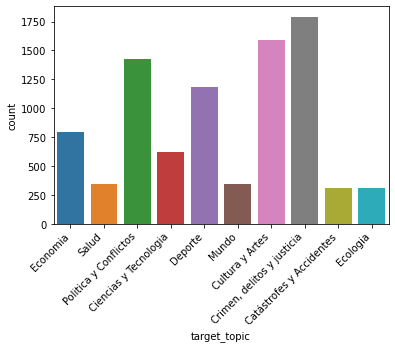

In [4]:
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
chart = sns.countplot(data.target_topic)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
None

In [5]:
data_final = data.groupby('target_topic').sample(n=308, random_state=2)
data_final.target_topic.value_counts()

Catástrofes y Accidentes      308
Ciencias y Tecnologia         308
Crimen, delitos y justicia    308
Cultura y Artes               308
Deporte                       308
Ecologia                      308
Economia                      308
Mundo                         308
Politica y Conflictos         308
Salud                         308
Name: target_topic, dtype: int64

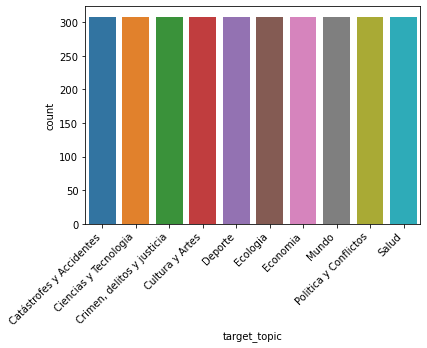

In [6]:
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
chart = sns.countplot(data_final.target_topic)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
None

In [7]:
data = data_final

### Label encoding

In [8]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
data['topic_num']= label_encoder.fit_transform(data['target_topic']) 

In [9]:
data

,title,text,target_topic,topic_num
7204,Dos hombres mueren en accidente en Valdivia: c...,"La madrugada de este sábado, dos hombres de 24...",Catástrofes y Accidentes,0
8362,Diputada Cicardini sufre accidente automovilís...,"Este miércoles, la diputada del Partido Social...",Catástrofes y Accidentes,0
4874,Accidente aéreo en Indonesia: Rescatistas hall...,Rescatistas de Indonesia recuperaron restos...,Catástrofes y Accidentes,0
5916,Acusan error en alcotest en fatal accidente en...,En prisión preventiva quedó el joven de 20 año...,Catástrofes y Accidentes,0
7757,Un milagro: Placa de dos toneladas cayó a cent...,Un verdadero milagro es lo que vivió un hombre...,Catástrofes y Accidentes,0
...,...,...,...,...
1101,Accidentes en playas durante diciembre-enero b...,Una notoria baja en los accidentes de playas ...,Salud,9
3094,Jóvenes entre 20 y 39 años son el 40% de los n...,Los jóvenes son un gran porcentaje de los cont...,Salud,9
4018,Informe Epidemiológico: Seis comunas del país ...,El Ministerio de Salud (Minsal) entregó este...,Salud,9
2748,"Tras saturación de hospitales, República Checa...","Con cifras récord de enfermos de covid-19, que...",Salud,9


## Preprocesamiento

### Parsear texto

In [10]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def process_text(text):
    text = text.lower().replace('\n',' ').replace('\r','').strip()
    text = re.sub(' +', ' ', text)
    text = re.sub(r'[^\w\s]','',text)
    
    
    stop_words = set(stopwords.words('spanish')) 
    word_tokens = word_tokenize(text) 
    filtered_sentence = [] 
    for w in word_tokens: 
        if w not in stop_words: 
            filtered_sentence.append(w) 
    
    text = " ".join(filtered_sentence)
    return text

In [11]:
data['text_parsed'] = data['text'].apply(process_text)

### Partición de los datos

In [12]:
from sklearn.model_selection import train_test_split

X = data['text_parsed'] # the features we want to analyze
ylabels = data['topic_num'] # the labels, or answers, we want to test against

X_train, X_test, y_train, y_test = train_test_split(X, ylabels, test_size=0.3)

In [13]:
from spacy.lang.es import Spanish


# Create our list of punctuation marks
punctuations = [".",",","!","?", ")","(","#","&"," ", ":", "'", "$", "/",'"', "}","{", ";"]

# Create our list of stopwords
#stop_words=[""]
stop_words = set(stopwords.words('spanish'))

# Load English tokenizer, tagger, parser, NER and word vectors
parser = Spanish()

# Creating our tokenizer function
def spacy_tokenizer(sentence):
    # Creating our token object, which is used to create documents with linguistic annotations.
    mytokens = parser(sentence)

    # Lemmatizing each token and converting each token into lowercase
    mytokens = [word.lower_ for word in mytokens]
        
    # Removing stop words
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]

    # return preprocessed list of tokens
    return mytokens

#### Vectorización de los textos en BoW o TF-IDF, con scikit-learn

In [14]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
bow_vector = CountVectorizer(tokenizer = spacy_tokenizer, ngram_range=(1,1))
tfidf_vector = TfidfVectorizer(tokenizer = spacy_tokenizer, ngram_range=(1,1))


## Entrenamiento 

In [16]:
from sklearn.linear_model import LogisticRegression # Regresion Logística
from sklearn.pipeline import Pipeline

# Logistic Regression Classifier
modelLR = LogisticRegression(random_state = 42, multi_class = 'ovr', class_weight=None, max_iter=1000)

# Create pipeline using Bag of Words
model1 = Pipeline([('preprocessing', bow_vector),
                 ('regression-ML', modelLR)])

# model generation
model1.fit(X_train,y_train)

Pipeline(steps=[('preprocessing',
                 CountVectorizer(tokenizer=<function spacy_tokenizer at 0x7feecea69170>)),
                ('regression-ML',
                 LogisticRegression(max_iter=1000, multi_class='ovr',
                                    random_state=42))])

In [17]:
# Logistic Regression Classifier
modelLR = LogisticRegression(random_state = 42, multi_class = 'ovr', class_weight=None, max_iter=1000)

model2 = Pipeline([('preprocessing', tfidf_vector),
                 ('regression-ML', modelLR)])

# model generation
model2.fit(X_train,y_train)

Pipeline(steps=[('preprocessing',
                 TfidfVectorizer(tokenizer=<function spacy_tokenizer at 0x7feecea69170>)),
                ('regression-ML',
                 LogisticRegression(max_iter=1000, multi_class='ovr',
                                    random_state=42))])

In [18]:
from sklearn.ensemble import RandomForestClassifier
modelRF = RandomForestClassifier(random_state=0)

model3 = Pipeline([('preprocessing', bow_vector),
                 ('regression-ML', modelRF)])

# model generation
model3.fit(X_train,y_train)

Pipeline(steps=[('preprocessing',
                 CountVectorizer(tokenizer=<function spacy_tokenizer at 0x7feecea69170>)),
                ('regression-ML', RandomForestClassifier(random_state=0))])

In [19]:
modelRF = RandomForestClassifier(random_state=0)
model4 = Pipeline([('preprocessing', tfidf_vector),
                 ('regression-ML', modelRF)])

# model generation
model4.fit(X_train,y_train)

Pipeline(steps=[('preprocessing',
                 TfidfVectorizer(tokenizer=<function spacy_tokenizer at 0x7feecea69170>)),
                ('regression-ML', RandomForestClassifier(random_state=0))])

# Evaluación modelo 

### Regresion logistica BOW

Accuracy:  0.8051948051948052
              precision    recall  f1-score   support

           0       0.91      0.92      0.91        97
           1       0.66      0.63      0.65       101
           2       0.68      0.72      0.70        82
           3       0.78      0.69      0.73        87
           4       0.93      0.95      0.94       107
           5       0.89      0.83      0.86       103
           6       0.77      0.82      0.79        89
           7       0.79      0.85      0.82        74
           8       0.77      0.71      0.74        87
           9       0.84      0.90      0.87        97

    accuracy                           0.81       924
   macro avg       0.80      0.80      0.80       924
weighted avg       0.81      0.81      0.80       924



<AxesSubplot:xlabel='topic_num', ylabel='row_0'>

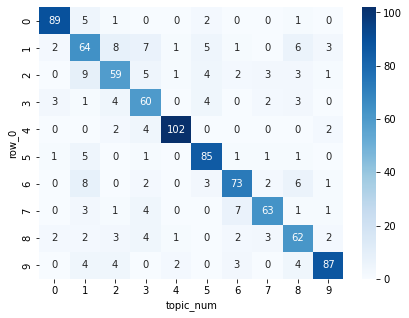

In [20]:
# Predicting with a test dataset
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

predicted = model1.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, predicted))
print(classification_report(y_test, predicted))
confusion_matrix = pd.crosstab(predicted, y_test)

fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot(121)
sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='g')

### Regresión logistica TF-IDF

Accuracy:  0.7997835497835498
              precision    recall  f1-score   support

           0       0.91      0.92      0.91        97
           1       0.71      0.64      0.68       101
           2       0.70      0.70      0.70        82
           3       0.71      0.70      0.71        87
           4       0.95      0.96      0.96       107
           5       0.90      0.76      0.82       103
           6       0.79      0.75      0.77        89
           7       0.71      0.92      0.80        74
           8       0.77      0.68      0.72        87
           9       0.81      0.95      0.87        97

    accuracy                           0.80       924
   macro avg       0.79      0.80      0.79       924
weighted avg       0.80      0.80      0.80       924



<AxesSubplot:xlabel='topic_num', ylabel='row_0'>

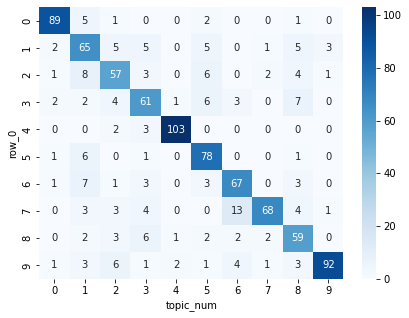

In [21]:
# Predicting with a test dataset
from sklearn.metrics import accuracy_score, classification_report

predicted = model2.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, predicted))
print(classification_report(y_test, predicted))
confusion_matrix = pd.crosstab(predicted, y_test)


fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot(121)
sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='g')

### Random Forest BOW

Accuracy:  0.7467532467532467
              precision    recall  f1-score   support

           0       0.77      0.95      0.85        97
           1       0.62      0.43      0.51       101
           2       0.68      0.66      0.67        82
           3       0.70      0.64      0.67        87
           4       0.79      0.97      0.87       107
           5       0.89      0.81      0.85       103
           6       0.71      0.66      0.69        89
           7       0.69      0.80      0.74        74
           8       0.77      0.55      0.64        87
           9       0.75      0.95      0.84        97

    accuracy                           0.75       924
   macro avg       0.74      0.74      0.73       924
weighted avg       0.74      0.75      0.74       924



<AxesSubplot:xlabel='topic_num', ylabel='row_0'>

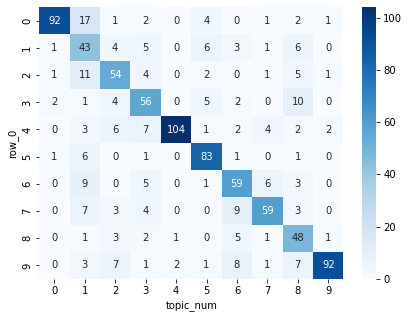

In [22]:
# Predicting with a test dataset
from sklearn.metrics import accuracy_score, classification_report

predicted = model3.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, predicted))
print(classification_report(y_test, predicted))
confusion_matrix = pd.crosstab(predicted, y_test)

fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot(121)
sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='g')

### Random Forest TF-IDF

Accuracy:  0.7510822510822511
              precision    recall  f1-score   support

           0       0.76      0.94      0.84        97
           1       0.66      0.48      0.55       101
           2       0.70      0.59      0.64        82
           3       0.66      0.70      0.68        87
           4       0.87      0.97      0.92       107
           5       0.87      0.75      0.80       103
           6       0.73      0.74      0.73        89
           7       0.68      0.84      0.75        74
           8       0.81      0.54      0.65        87
           9       0.74      0.93      0.83        97

    accuracy                           0.75       924
   macro avg       0.75      0.75      0.74       924
weighted avg       0.75      0.75      0.74       924



<AxesSubplot:xlabel='topic_num', ylabel='row_0'>

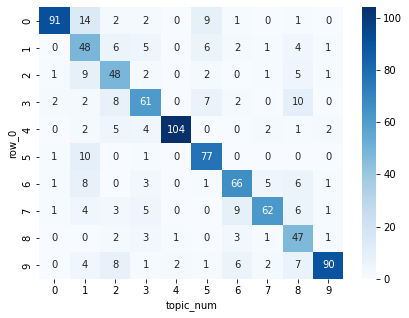

In [23]:
# Predicting with a test dataset
from sklearn.metrics import accuracy_score, classification_report

predicted = model4.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, predicted))
print(classification_report(y_test, predicted))
confusion_matrix = pd.crosstab(predicted, y_test)

fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot(121)
sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='g')